<a href="https://colab.research.google.com/github/kunjkinger/machine-learning-projects/blob/reinforcement_learning/comapringepsilons_decaying_and_normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

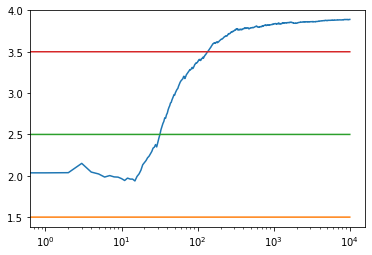

mean estimate: 1.986632047201878
mean estimate: 3.010643411163592
mean estimate: 3.998970109028804
percent suboptimal for epsilon = : 0.1 0.0724


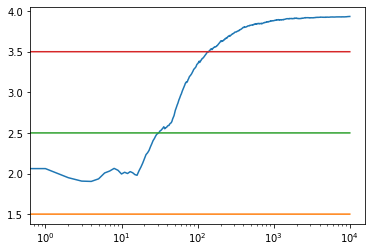

mean estimate: 2.0112632619711603
mean estimate: 3.0111408459302558
mean estimate: 3.997538133460612
percent suboptimal for epsilon = : 0.05 0.0425


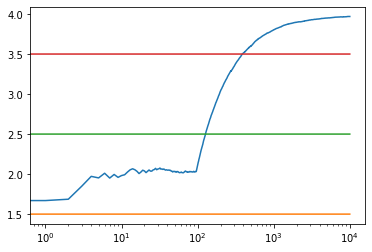

mean estimate: 2.0026268193294516
mean estimate: 2.9382567744536825
mean estimate: 3.9989517544649402
percent suboptimal for epsilon = : 0.01 0.016


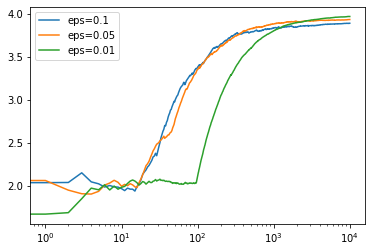

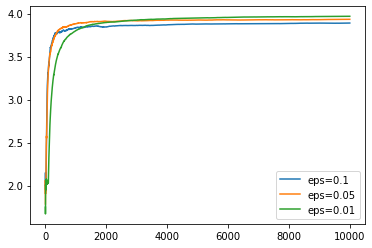

In [10]:
class BanditArm:
  def __init__(self,m):
    self.m = m # true win rate
    self.m_estimate = 0. #win estimation
    self.N = 0.

  def pull(self):
      #draw a 1 with probability p
      return np.random.random() + self.m

  def update(self,x):
      self.N += 1.
      self.m_estimate = ((self.N-1)*self.m_estimate + x)/self.N
def runexperiment(m1,m2,m3,Eps,N):
  bandits = [BanditArm(m1),BanditArm(m2),BanditArm(m3)]
  means = np.array([m1,m2,m3])
  true_best = np.argmax(means)
  count_suboptimal = 0

  data = np.empty(N)

  for i in range(N):
    p = np.random.random()
      #use epsilon greedy to select next bandit
    if p < Eps:
      j =np.random.choice(len(bandits))
    else:
      j = np.argmax([b.m_estimate for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    if j != true_best:
      count_suboptimal += 1

    data[i] = x
  cumulative_average = np.cumsum(data)/(np.arange(N) + 1)

  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print('mean estimate:', b.m_estimate)

  print('percent suboptimal for epsilon = :',  Eps, float(count_suboptimal) / N)

  return (cumulative_average)

if __name__ == '__main__':
  m1,m2,m3 = 1.5,2.5,3.5
  c_1 = runexperiment(m1,m2,m3,0.1,10000)
  c_05 = runexperiment(m1,m2,m3,0.05,10000)
  c_01 = runexperiment(m1,m2,m3,0.01,10000)

  #log scale plot
  plt.plot(c_1,label='eps=0.1')
  plt.plot(c_05,label='eps=0.05')
  plt.plot(c_01,label='eps=0.01')
  plt.legend()
  plt.xscale('log')
  plt.show()

  #linear plot
  
  plt.plot(c_1,label='eps=0.1')
  plt.plot(c_05,label='eps=0.05')
  plt.plot(c_01,label='eps=0.01')
  plt.legend()
  plt.show()